In [23]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\psm34\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


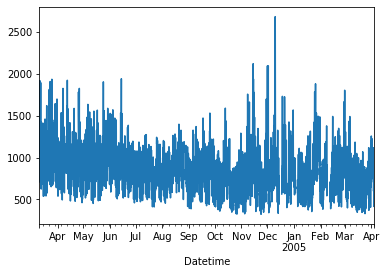

In [24]:
df['PT08.S3(NOx)'].plot()

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64

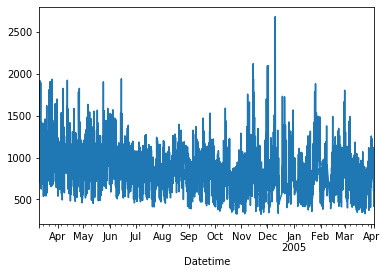

In [25]:
NOx = df['PT08.S3(NOx)']
NOx.interpolate(inplace=True)
NOx.plot()
NOx

In [26]:
q1 = NOx.quantile(0.25)  # upper 25%   .quantile  백분율
q2 = NOx.quantile(0.5)
q3 = NOx.quantile(0.75)
print(q1, q2, q3)

654.0 804.0 968.0


In [27]:
iqr = q3 - q1
upper_fence = q3 + 1.5 * iqr 
lower_fence = q1 - 1.5 * iqr
print(upper_fence,'\n',lower_fence,'\n',iqr)

1439.0 
 183.0 
 314.0


Text(0.5, 0, 'PT08.S3(NOx)')

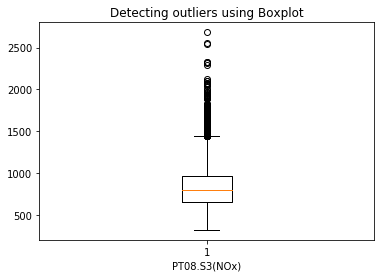

In [28]:
plt.boxplot(NOx)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('PT08.S3(NOx)')

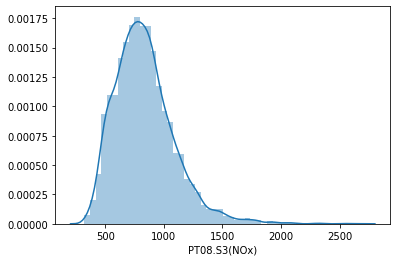

In [29]:
# Zscore
import seaborn as sns
sns.distplot(NOx)

In [30]:
mean = np.mean(NOx)
std = np.std(NOx)
print("mean = ", mean, "\nstd =" , std)

mean =  832.7588970823982 
std = 255.69616900657363


In [40]:
outliers = NOx.loc[np.abs((NOx-mean)/std) > 3]    
outliers

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64

In [41]:
mask = NOx.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

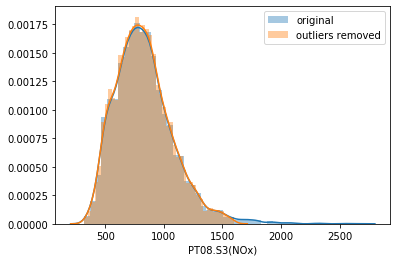

In [45]:
sns.distplot(NOx, axlabel='PT08.S3(NOx)', label='original')
sns.distplot(NOx[~mask], label='outliers removed')
plt.legend()